<a href="https://colab.research.google.com/github/OMRNASSER/Python/blob/main/SocialIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#team 17 
#عمر عبد الناصر احمد 
#عبدالله محمد محمود ابوبريك 
#(سكشن 1)احمد جمال السيد ابو العلا
#محمد حمدي عبد الرحيم احمد 
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from operator import itemgetter
from datetime import datetime, timedelta
from scipy.special import gamma,gammainc,gammaincc,erf
from scipy.optimize import minimize, root_scalar
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.backends import backend_pdf as bpdf


In [3]:
g= nx.read_edgelist('/content/CollegeMsg_ed.txt',create_using=nx.DiGraph())

In [4]:
print(g.edges(data=True))

[('u', 'v', {}), ('1', '2', {}), ('1', '123', {}), ('1', '135', {}), ('1', '159', {}), ('1', '30', {}), ('1', '255', {}), ('1', '146', {}), ('1', '101', {}), ('1', '211', {}), ('1', '397', {}), ('1', '477', {}), ('1', '302', {}), ('1', '323', {}), ('1', '1014', {}), ('1', '42', {}), ('1', '1271', {}), ('1', '312', {}), ('1', '3', {}), ('1', '1440', {}), ('1', '856', {}), ('1', '1626', {}), ('1', '161', {}), ('1', '44', {}), ('1', '36', {}), ('1', '281', {}), ('1', '1655', {}), ('1', '1779', {}), ('1', '1790', {}), ('1', '1675', {}), ('1', '652', {}), ('1', '132', {}), ('1', '1312', {}), ('1', '32', {}), ('3', '4', {}), ('3', '84', {}), ('3', '155', {}), ('3', '58', {}), ('3', '185', {}), ('3', '32', {}), ('3', '132', {}), ('3', '221', {}), ('3', '51', {}), ('3', '308', {}), ('3', '88', {}), ('3', '618', {}), ('3', '68', {}), ('3', '99', {}), ('3', '385', {}), ('3', '814', {}), ('3', '372', {}), ('3', '72', {}), ('3', '488', {}), ('3', '42', {}), ('3', '371', {}), ('3', '498', {}), ('3'

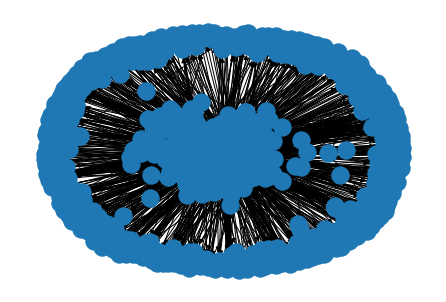

In [5]:
nx.draw(g)


In [6]:
import community.community_louvain as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
G= nx.read_edgelist('/content/CollegeMsg_ed.txt')
partition = community_louvain.best_partition(G)

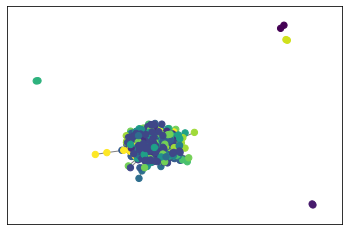

In [7]:
# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

<BarContainer object of 255 artists>

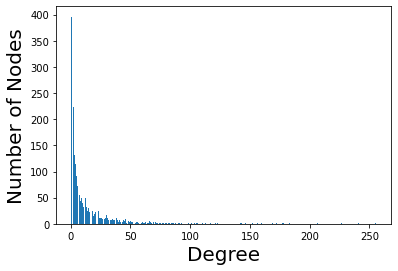

In [8]:
from collections import Counter
degree_sequence = [G.degree(n) for n in G.nodes]
degree_counts = Counter(degree_sequence)
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())
plt.xlabel("Degree", fontsize=20)
plt.ylabel("Number of Nodes", fontsize=20)
plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]
plt.bar(plot_x, plot_y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 98, 99, 102, 103, 104, 105, 106, 108, 109, 110, 111, 114, 116, 117, 118, 121, 123, 129, 130, 132, 134, 135, 136, 137, 138, 139, 145, 146, 153, 157, 160, 161, 164, 165, 174, 175, 182, 192, 208, 216, 221, 233, 236, 243, 256, 265, 280, 290, 309, 319, 339]
145


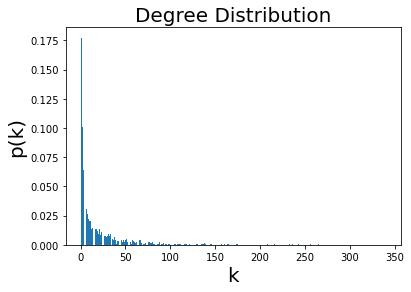

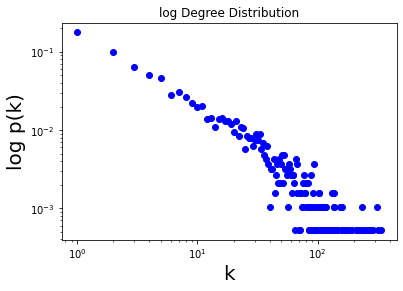

In [9]:
def plot_degree_dist(G):
    
    degrees = G.degree()
    degrees = dict(degrees)
    values = sorted(set(degrees.values()))
    print(values)
    histo = [list(degrees.values()).count(x) for x in values]
    P_k = [x / G.order() for x in histo]
    print(len(P_k))
    
    plt.figure()
    plt.bar(values, P_k)
    plt.xlabel("k",fontsize=20)
    plt.ylabel("p(k)", fontsize=20)
    plt.title("Degree Distribution", fontsize=20)
    
    plt.show()
    plt.figure()
    plt.grid(False)
    plt.loglog(values, P_k, "bo")
    plt.xlabel("k", fontsize=20)
    plt.ylabel("log p(k)", fontsize=20)
    plt.title("log Degree Distribution")
    plt.show()
    plt.show()  
plot_degree_dist(g)


In [78]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state
initial_state(RG)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep',
 20: 'asleep',
 21: 'asleep',
 22: 'asleep',
 23: 'asleep',
 24: 'asleep',
 25: 'asleep',
 26: 'asleep',
 27: 'asleep',
 28: 'asleep',
 29: 'asleep',
 30: 'asleep',
 31: 'asleep',
 32: 'asleep',
 33: 'asleep',
 34: 'asleep',
 35: 'asleep',
 36: 'asleep',
 37: 'asleep',
 38: 'asleep',
 39: 'asleep',
 40: 'asleep',
 41: 'asleep',
 42: 'asleep',
 43: 'asleep',
 44: 'asleep',
 45: 'asleep',
 46: 'asleep',
 47: 'asleep',
 48: 'asleep',
 49: 'asleep',
 50: 'asleep',
 51: 'asleep',
 52: 'asleep',
 53: 'asleep',
 54: 'asleep',
 55: 'asleep',
 56: 'asleep',
 57: 'asleep',
 58: 'asleep',
 59: 'asleep',
 60: 'asleep',
 61: 'asleep',
 62: 'asleep',
 63: 'asleep',
 64: 'asleep',
 65: 'asleep',
 66: 'asleep',
 67: 

In [79]:
test_state = initial_state(RG)
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state


In [80]:
state_transition(RG , test_state)

{19: 'awake',
 20: 'awake',
 21: 'awake',
 37: 'awake',
 40: 'awake',
 47: 'awake',
 64: 'awake',
 69: 'awake',
 76: 'awake',
 81: 'awake',
 85: 'awake',
 91: 'awake',
 96: 'awake',
 98: 'awake',
 99: 'awake',
 102: 'awake',
 104: 'awake',
 107: 'awake',
 108: 'awake',
 110: 'awake',
 117: 'awake',
 130: 'awake',
 135: 'awake',
 139: 'awake',
 147: 'awake',
 149: 'awake',
 152: 'awake',
 153: 'awake',
 155: 'awake',
 156: 'awake',
 166: 'awake',
 167: 'awake',
 176: 'awake',
 178: 'awake',
 181: 'awake',
 187: 'awake',
 195: 'awake',
 206: 'awake',
 208: 'awake',
 214: 'awake',
 219: 'awake',
 220: 'awake',
 222: 'awake',
 223: 'awake',
 226: 'awake',
 230: 'awake',
 233: 'awake',
 236: 'awake',
 239: 'awake',
 246: 'awake',
 249: 'awake',
 250: 'awake',
 252: 'awake',
 259: 'awake',
 261: 'awake',
 268: 'awake',
 271: 'awake',
 279: 'awake',
 297: 'awake',
 306: 'awake',
 318: 'awake',
 321: 'awake',
 336: 'awake',
 342: 'awake',
 347: 'awake',
 352: 'awake',
 357: 'awake',
 360: 'awa

In [81]:


from collections import Counter
from operator import itemgetter

import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


class StopCondition(StopIteration):
    pass

class Simulation:
    '''Simulate state transitions on a network'''

    def __init__(self, G, initial_state, state_transition,
            stop_condition=None, name=''):
        '''
        Create a Simulation instance.
        Args:
            G: a networkx.Graph instance.
            initial_state: function with signature `initial_state(G)`, that
                accepts a single argument, the Graph, and returns a dictionary
                of all node states. The keys in this dict should be node names
                and the values the corresponding initial node state.
            state_transition: function with signature
                `state_transition(G, current_state)` that accepts two
                arguments, the Graph and a dictionary of current node states,
                and returns a dictionary of updated node states. The keys in
                this dict should be node names and the values the corresponding
                updated node state.
            stop_condition (optional): function with signature
                `stop_condition(G, current_state)` that accepts two arguments,
                the Graph and a dictionary of current node states, and returns
                True if the simulation should be stopped at its current state.
        Keyword Args:
            name (optional): a string used in titles of plots and drawings.
        Raises:
            ValueError: if not all graph nodes have an initial state.
        '''
        self.G = G.copy()
        self._initial_state = initial_state
        self._state_transition = state_transition
        self._stop_condition = stop_condition
        # It's okay to specify stop_condition=False
        if stop_condition and not callable(stop_condition):
            raise TypeError("'stop_condition' should be a function")
        self.name = name or 'Simulation'

        self._states = []
        self._value_index = {}
        self._cmap = plt.cm.get_cmap('tab10')

        self._initialize()

        self._pos = nx.layout.spring_layout(G)

    def _append_state(self, state):
        self._states.append(state)
        # Update self._value_index
        for value in set(state.values()):
            if value not in self._value_index:
                self._value_index[value] = len(self._value_index)

    def _initialize(self):
        if self._initial_state:
            if callable(self._initial_state):
                state = self._initial_state(self.G)
            else:
                state = self._initial_state
            nx.set_node_attributes(self.G, state, 'state')

        if any(self.G.nodes[n].get('state') is None for n in self.G.nodes):
            raise ValueError('All nodes must have an initial state')

        self._append_state(state)

    def _step(self):
        # We're choosing to use the node attributes as the source of truth.
        # This allows the user to manually perturb the network in between steps.
        state = nx.get_node_attributes(self.G, 'state')
        if self._stop_condition and self._stop_condition(self.G, state):
            raise StopCondition
        state = nx.get_node_attributes(self.G, 'state')
        new_state = self._state_transition(self.G, state)
        state.update(new_state)
        nx.set_node_attributes(self.G, state, 'state')
        self._append_state(state)

    def _categorical_color(self, value):
        index = self._value_index[value]
        node_color = self._cmap(index)
        return node_color

    @property
    def steps(self):
        ''' Returns the number of steps the sumulation has run '''
        return len(self._states) - 1

    def state(self, step=-1):
        '''
        Get a state of the simulation; by default returns the current state.
        Args:
            step: the step of the simulation to return. Default is -1, the
            current state.
        Returns:
            Dictionary of node states.
        Raises:
            IndexError: if `step` argument is greater than the number of steps.
        '''
        try:
            return self._states[step]
        except IndexError:
            raise IndexError('Simulation step %i out of range' % step)

    def draw(self, step=-1, labels=None, **kwargs):
        '''
        Use networkx.draw to draw a simulation state with nodes colored by
        their state value. By default, draws the current state.
        Args:
            step: the step of the simulation to draw. Default is -1, the
            current state.
            kwargs: keyword arguments are passed to networkx.draw()
        Raises:
            IndexError: if `step` argument is greater than the number of steps.
        '''
        state = self.state(step)
        node_colors = [self._categorical_color(state[n]) for n in self.G.nodes]
        nx.draw(self.G, pos=self._pos, node_color=node_colors, **kwargs)

        if labels is None:
            labels = sorted(set(state.values()), key=self._value_index.get)
        patches = [mpl.patches.Patch(color=self._categorical_color(l), label=l)
                   for l in labels]
        plt.legend(handles=patches)

        if step == -1:
            step = self.steps
        if step == 0:
            title = 'initial state'
        else:
            title = 'step %i' % (step)
        if self.name:
            title = '{}: {}'.format(self.name, title)
        plt.title(title)

    def plot(self, min_step=None, max_step=None, labels=None, **kwargs):
        '''
        Use pyplot to plot the relative number of nodes with each state at each
        simulation step. By default, plots all simulation steps.
        Args:
            min_step: the first step of the simulation to draw. Default is
                None, which plots starting from the initial state.
            max_step: the last step, not inclusive, of the simulation to draw.
                Default is None, which plots up to the current step.
            labels: ordered sequence of state values to plot. Default is all
                observed state values, approximately ordered by appearance.
            kwargs: keyword arguments are passed along to plt.plot()
        Returns:
            Axes object for the current plot
        '''
        x_range = range(min_step or 0, max_step or len(self._states))
        counts = [Counter(s.values()) for s in self._states[min_step:max_step]]
        if labels is None:
            labels = {k for count in counts for k in count}
            labels = sorted(labels, key=self._value_index.get)

        for label in labels:
            series = [count.get(label, 0) / sum(count.values()) for count in counts]
            plt.plot(x_range, series, label=label, **kwargs)

        title = 'node state proportions'
        if self.name:
            title = '{}: {}'.format(self.name, title)
        plt.title(title)
        plt.xlabel('Simulation step')
        plt.ylabel('Proportion of nodes')
        plt.legend()
        plt.xlim(x_range.start)

        return plt.gca()

    def run(self, steps=1):
        '''
        Run the simulation one or more steps, as specified by the `steps`
        argument. Default is to run a single step.
        Args:
            steps: number of steps to advance the simulation.
        '''
        for _ in range(steps):
            try:
                self._step()
            except StopCondition as e:
                print(
                    "Stop condition met at step %i." % self.steps
                    )
                break

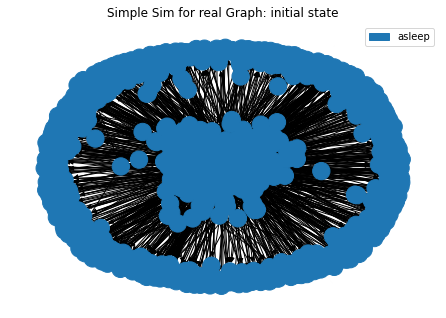

In [65]:
#Real Grap Sim
test_state = initial_state(g)
state_transition(G , test_state)
sim = Simulation(g, initial_state, state_transition, name='Simple Sim for Real Graph')
sim.state()
sim.draw()

In [67]:
sim.run()
sim.steps

1

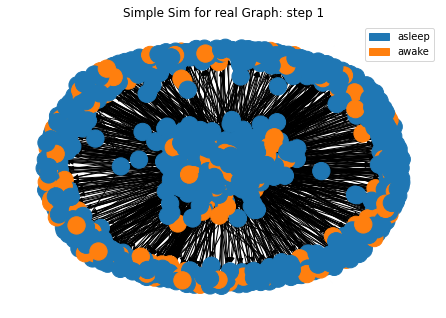

In [68]:
sim.draw()

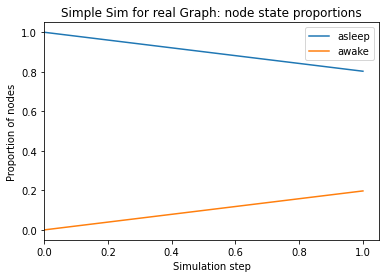

In [69]:
sim.plot()

In [70]:
sim.run(10)
sim.steps

11

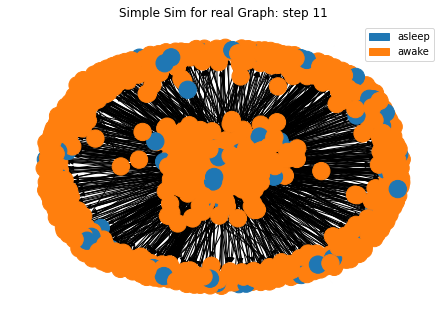

In [71]:
sim.draw()

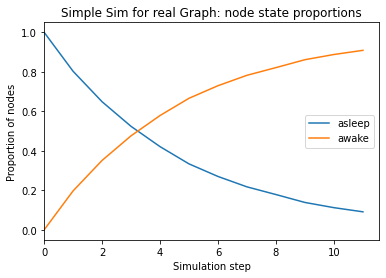

In [72]:
sim.plot()

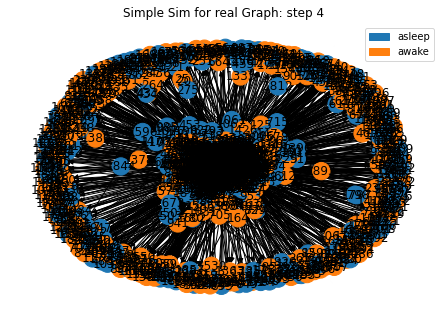

In [73]:
sim.draw(4, with_labels=True)



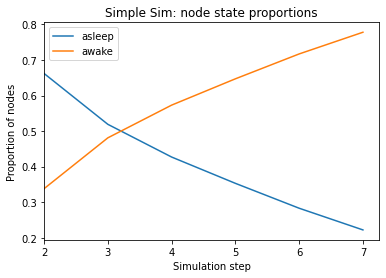

In [84]:
sim.plot(min_step=2, max_step=8)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


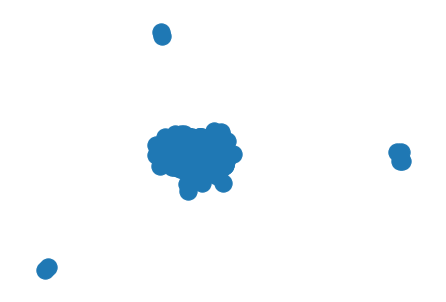

In [66]:
#Adajancency Matrix 

A = nx.to_numpy_matrix(g)
print(A)
#Graph From Matrix A
H=nx.from_numpy_matrix(A) 
nx.draw(H)
# g=nx.read_edgelist('/content/CollegeMsg_ed.txt')
# Adj = nx.adjacency_matrix(g).todense()
# Adj